shortest path from A to E is ['A', 'C', 'E']


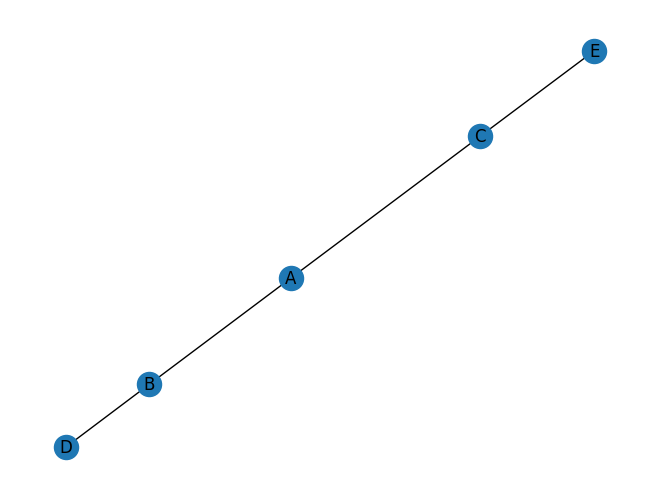

In [3]:
import networkx as nx
G = nx.Graph()
G.add_edge("A","B", weight=4)
G.add_edge("A","C", weight=2)
G.add_edge("B","D", weight=12)
#G.add_edge("A","E", weight=3)
G.add_edge("C","E", weight=5)
shortest_path_a_e = nx.shortest_path(G, "A", "E", weight="weight")
print(f"shortest path from A to E is {shortest_path_a_e}")
nx.draw(G, with_labels = True)

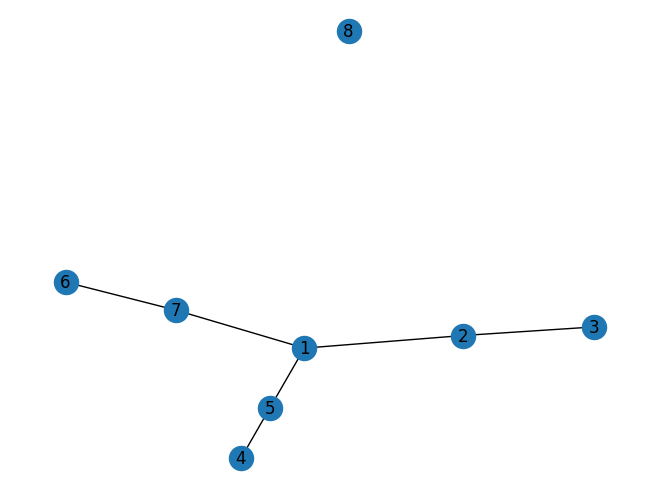

In [4]:
G1 = nx.Graph()
G1.add_node(1)
G1.add_nodes_from([2,3])
G1.add_nodes_from([4,6,5,7,8])

G1.add_edge(1,2)
G1.add_edge(3,2)
G1.add_edge(4,5)
G1.add_edge(6,7)
G1.add_edge(1,5)
G1.add_edge(1,7)
nx.draw(G1, with_labels=True)

In [ ]:
G1.add_edges_from([(2,3),(5,7)])
node_list = G1.nodes()
print(f"the node list is {node_list}")
edges_list = G1.edges()
print(f" the edges are {edges_list}")
nx.draw(G1, with_labels=True)

In [ ]:
G1.remove_edge(1,2)
print(f"the edge list is {G1.edges()}")
#print(f"the number of nodes is {G1.number}")
print(f"the degrees of node 3 is {G1.degree(3)}")
nx.draw(G1, with_labels=True)

In [ ]:
import networkx as nx
DG = nx.DiGraph()
DG.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,2),(4,6)])
print(f"the out edges of node 4 are {DG.out_edges(4)}")
print(f"the in degree of node 2 are {DG.in_degree(2)}")
print(f"the successor of node 4 are {list(DG.successors(4))}")
print(f"the predecessors of node 2 are {list(DG.predecessors(2))}")
nx.draw(DG, with_labels=True)

In [ ]:
import matplotlib.pyplot as plt1
G2 = nx.Graph()
G2.add_edge(1,2,weight_ = 12.5)
G2.add_edge(3,2,weight_ = 4.5)
G2.add_edge(4,2,weight_ = 3.5)
G2.add_edge(5,3,weight_ = 8.5)
pos = nx.curcular_layout(G2)
nx.draw(G2, pos, with_labels= True)
edge_weight = nx.get_edge_attributes(G2, "weight_")
#nx.draw_networkx_edge_labels
plt1.show()

In [ ]:
import matplotlib.pyplot as plt1
G = nx.path_graph(8)
pos = nx.spring_layout(G,seed=57)
nx.draw(G, pos=pos)
plt1.show()

In [ ]:
G3 = nx.grid_2d_graph(5,5)
for line in nx.generate_adjlist(G3):
    print(line)

nx.write_edgelist(G3, path="grid.edgelist", delimiter=":")
H = nx.read_edgelist(path="grid.edgelist", delimiter=":")

pos = nx.spring_layout(H, seed=200)
nx.draw(H,pos)
plt1.show()

In [ ]:
import numpy as np
import networkx as nx
G4 = nx.path_graph(20)
center_node = 10
edge_nodes = set(G4) - {center_node}
pos = nx.circular_layout(G4.subgraph(edge_nodes))
#pos[center_node] = np.array([0,0])
pos[center_node] = np.array([10,0])
nx.draw(G4,pos,with_labels=True)

In [ ]:
import matplotlib.pyplot as plt1
G = nx.complete_graph(5, create_using=nx.DiGraph)
G.add_edge(0,0)
G.add_edge(3,3)
G.add_edge(4,4)

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edges(G, pos, arrowstyle="<| -", style="dashed")
plt1.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the number of nodes and the number of edges per new node
n_nodes = 2000  # Number of nodes
m_edges = 3     # Each new node is connected to 3 existing nodes

# Generate the Barabási-Albert graph
ba_graph = nx.barabasi_albert_graph(n_nodes, m_edges)

# Basic information about the graph
print(f"Number of nodes: {ba_graph.number_of_nodes()}")
print(f"Number of edges: {ba_graph.number_of_edges()}")

# Plotting a small portion of the graph to visualize (not the full graph due to size)
plt.figure(figsize=(8, 8))
sample_subgraph = nx.subgraph(ba_graph, range(0, 100))  # Only show a subgraph of 100 nodes
nx.draw(sample_subgraph, node_size=50, with_labels=False)
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the number of leaves (nodes connected to the center)
n_leaves = 10  # This means the total nodes will be n_leaves + 1 (the center node)

# Create a star graph
star_graph = nx.star_graph(n_leaves)

# Basic information about the star graph
print(f"Number of nodes: {star_graph.number_of_nodes()}")
print(f"Number of edges: {star_graph.number_of_edges()}")

# Draw the star graph
plt.figure(figsize=(6, 6))
nx.draw(star_graph, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.title("Star Graph with 10 Leaves")
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph object to represent the multilayer graph
multilayer_graph = nx.Graph()

# Adding nodes (nodes can exist across different layers)
multilayer_graph.add_nodes_from([1, 2, 3, 4], layer='Layer 1')
multilayer_graph.add_nodes_from([1, 2, 3, 4], layer='Layer 2')

# Adding edges within the first layer
multilayer_graph.add_edges_from([(1, 2), (2, 3), (3, 4)], layer='Layer 1')

# Adding edges within the second layer
multilayer_graph.add_edges_from([(1, 3), (2, 4)], layer='Layer 2')

# Adding inter-layer edges (cross-layer connections)
multilayer_graph.add_edge(1, 4, layer='Cross-layer')

# Define edge colors based on layers for visualization
edge_colors = []
for u, v, d in multilayer_graph.edges(data=True):
    if d.get('layer') == 'Layer 1':
        edge_colors.append('blue')
    elif d.get('layer') == 'Layer 2':
        edge_colors.append('green')
    else:
        edge_colors.append('red')  # Cross-layer edges

# Drawing the graph
pos = nx.spring_layout(multilayer_graph)  # Spring layout for better visualization

plt.figure(figsize=(8, 8))
nx.draw(multilayer_graph, pos, with_labels=True, edge_color=edge_colors, node_color='lightblue', node_size=500)
plt.title('Multilayer Graph with Two Layers and Cross-Layer Connections')
plt.show()


[(4, 5)]
1
[5]
[1]


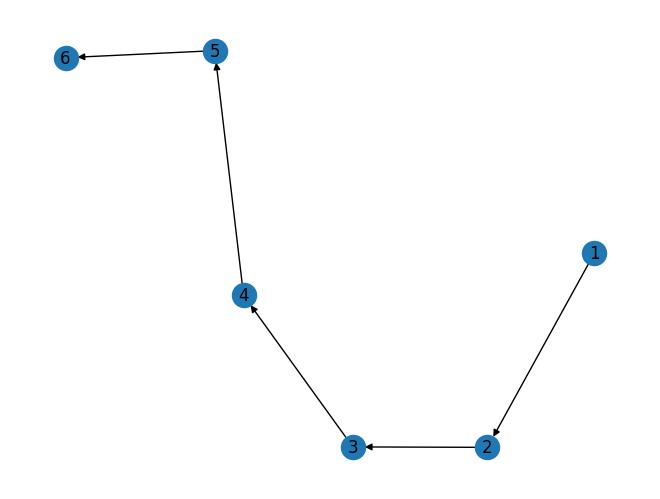

In [1]:
import networkx as nx
DG = nx.DiGraph()
DG.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6)])
print(DG.out_edges(4))
print(DG.in_degree(2))
print(list(DG.successors(4)))
print(list(DG.predecessors(2)))
nx.draw(DG, with_labels=True)

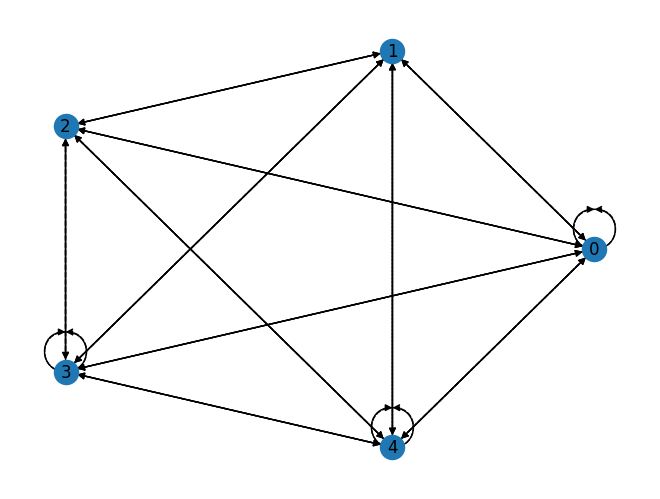

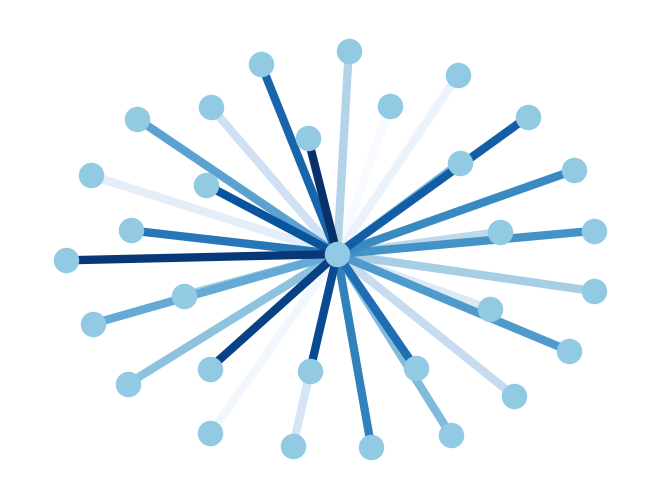

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt1

G = nx.complete_graph(5,create_using=nx.DiGraph)
G.add_edge(0,0)
G.add_edge(3,3)
G.add_edge(4,4)

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edges(G, pos, arrowstyle="<|-", style="dashed")
plt1.show()

G5 = nx.star_graph(30)
pos = nx.spring_layout(G5, seed=100)
colors = range(30)
options = {
    "node_color":"#91CAE2",
    "edge_color":colors,
    "width":6,
    "edge_cmap":plt1.cm.Blues,
    "with_labels":False,
}
nx.draw(G5, pos,**options)
plt1.show()
